Вы уже знакомы с конструкцией try-except, научились отлавливать стандартные исключения и поднимать их при необходимости. В этом уроке мы закончим говорить об конструкции try-except, обсудим небольшие нюансы работы с ней, а также попробуем написать собственные классы-исключения.

Пожалуйста, посмотрите на схему, представленную ниже.

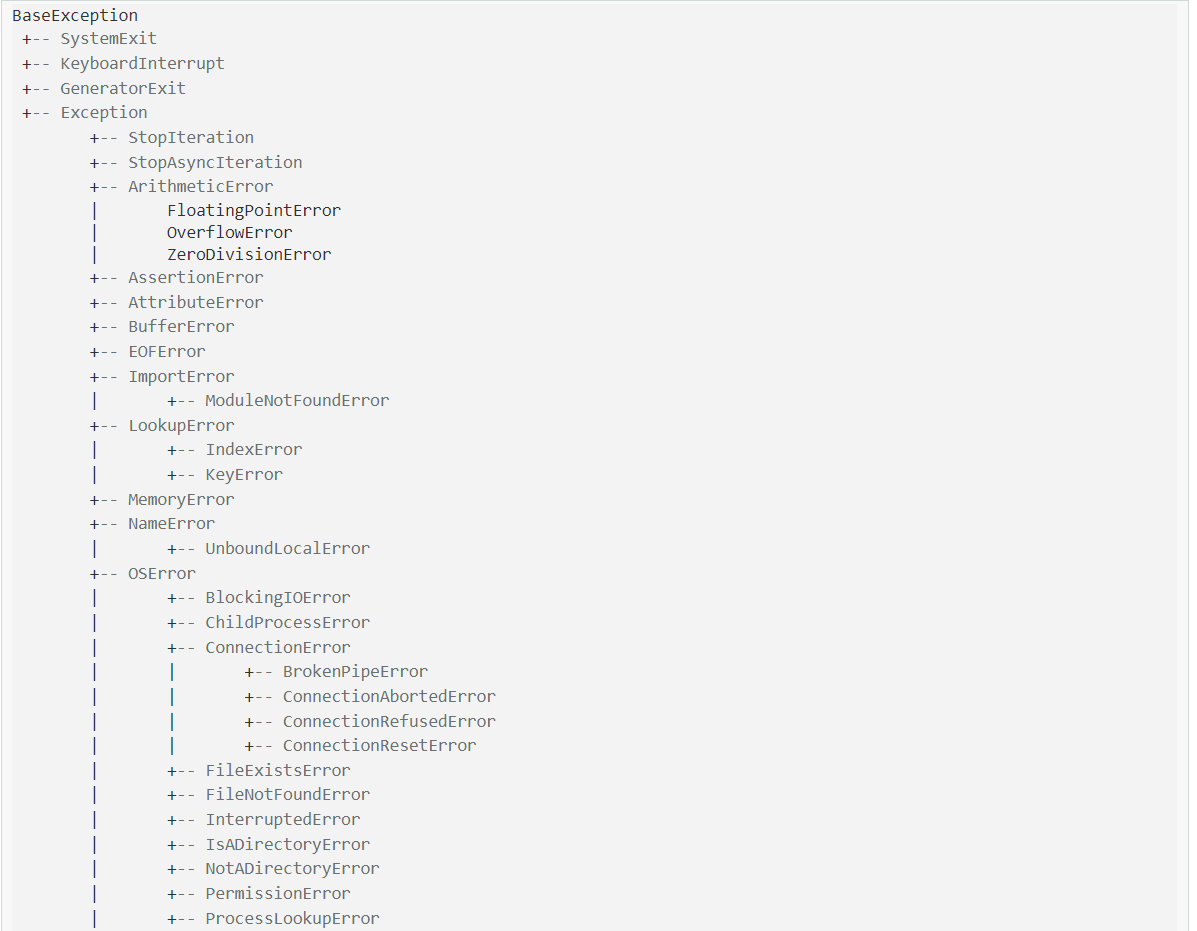
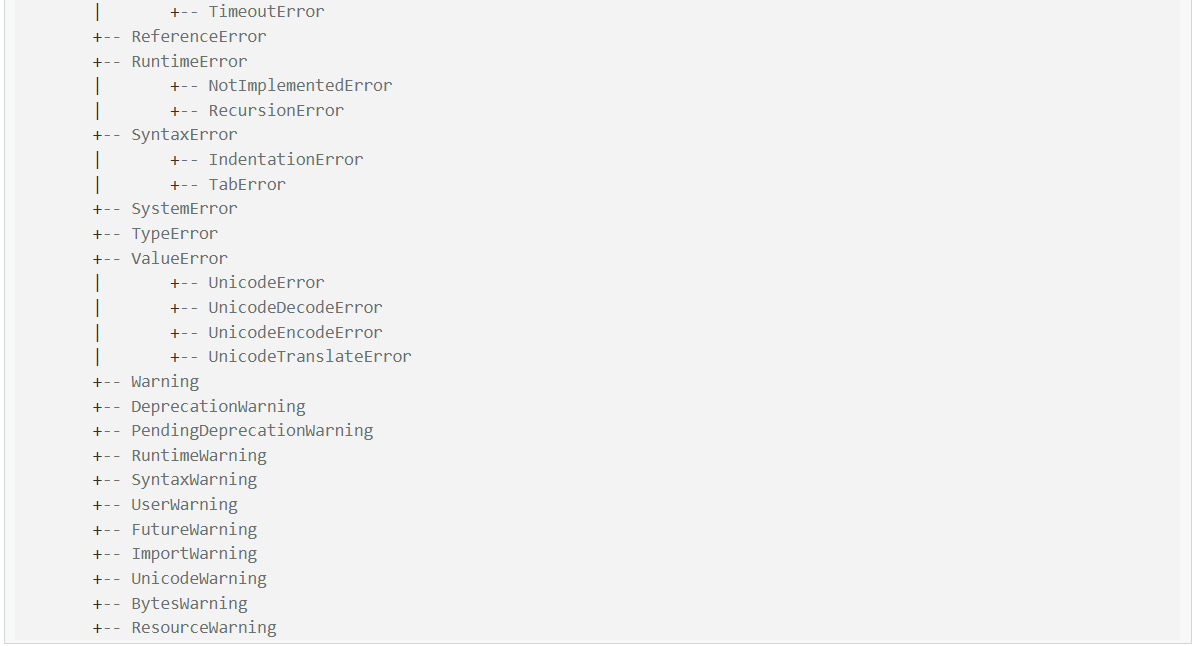

### Эта система — дерево стандартных исключений.

Как нетрудно было догадаться, исключения представлены определёнными классами, которые в той или иной степени наследуются от BaseException.

Классы +-- SystemExit +-- KeyboardInterrupt +-- GeneratorExit являются исключениями, которые нельзя поймать, поскольку их возникновение не зависит от выполнения программы. А все, что наследуются от Exception, можно отловить и обработать (хорошенько так). Однако некоторые из них возникают очень редко.

Главное здесь — понять, что «ловить» в блоке except можно не только сам класс, но и его родителя, например:


In [1]:
try:
    raise ZeroDivisionError  # возбуждаем исключение ZeroDivisionError
except ArithmeticError:  # ловим его родителя
    print("Hello from arithmetic error")

Hello from arithmetic error


Такой способ отлова будет работать прекрасно. Но делать так не стоит, потому что вы рискуете упустить детали. С другой стороны, порой даже на больших проектах можно встретить что-то подобное:

In [2]:
# пример из реального проекта
try:
    *код которые мог вызывать ошибку*
except Exception:
    pass

SyntaxError: invalid syntax (2093180859.py, line 3)

Иными словами, если что-то пошло не так, то мы просто закрываем на это глаза и идём дальше по коду. Код настоящего дзен-буддиста, что тут ещё скажешь.

Действуя от обратного, однако, надо быть осторожным. Если, например, надо поймать несколько исключений, то идти следует вверх по дереву.

Например:

In [3]:
try:
    raise ZeroDivisionError
except ArithmeticError:
    print("Arithmetic error")
except ZeroDivisionError:
    print("Zero division error")

Arithmetic error


ArithmeticError является более абстрактным (находящимся выше в иерархическом дереве, родительским) классом. Если вы хотите ловить сначала исключения-потомки, а затем родительские исключения, убедитесь, что в блоке except отлов родительского исключения стоит ниже, чем отлов исключения-потомка. Иначе говоря, ваша конструкция отлова исключений должна идти от конкретного класса к более абстрактному.

In [5]:
#Вот правильный пример для наглядности:
try:
    raise ZeroDivisionError
except ZeroDivisionError:  # сначала пытаемся поймать потомка
    print("Zero division error")
except ArithmeticError:  # потом ловим родителя
    print("Arithmetic error")
    
    

Zero division error


Это всё, что хотелось ещё рассказать о конструкции try-except.

Если кратко обобщить, то можно сказать так: исключения — это тоже классы. Будучи классами, они могут наследоваться. «Отлавливать» можно как сам класс, так и его родителя (в любом колене). В этом случае надо убедиться в том, чтобы сначала обрабатывались более конкретные исключения, иначе они могут быть перекрыты их родителями и попросту упущены.

Иногда может понадобиться написать собственное исключение. Например, вы пишете собственную игру и вам нужно обработать ситуацию, когда ваш персонаж пытается выучить способность, при этом не достигнув нужного уровня. Или пытается положить в уже заполненный инвентарь ещё какой-то предмет.

Принцип написания и отлова собственного исключения следующий:

In [6]:
class MyException(Exception):  # создаём пустой класс исключения 
    pass

try:
    raise MyException("message")  # поднимаем наше исключение
except MyException as e:  # ловим его
    print(e)  # выводим информацию об исключении

message


Лучше всего, чтобы исключения были связаны между собой, то есть наследовались от общего класса исключения. Если продолжить пример с игрой из прошлого абзаца, то общим классом был бы GameplayException.

Наследуются исключения для того, чтобы можно было, продолжая всё тот же пример, отлавливать отдельно игровые исключения и отдельно исключения, касающиеся ресурсов (закончилась оперативная память, место на диске и так далее.

Давайте теперь попробуем построить собственные исключения с наследованием:

In [7]:
class ParentException(Exception):  # создаём пустой класс исключения, наследуемся от exception
    pass

 
class ChildException(ParentException):  # создаём пустой класс исключения-потомка, наследуемся от ParentException
    pass

 
try:
    raise ChildException("message")  # поднимаем исключение-потомок
except ParentException as e:  # ловим его родителя
    print(e)  # выводим информацию об исключении

message


В этом случае мы успешно обработали собственный класс-наследник, хотя он и не является ParentException. Когда исключение возникает, в каждом блоке except по порядку интерпретатор проверяет, является ли исключение наследником или самим классом отлавливаемого исключения, и если да, то выполняет код в except.

Кстати говоря, класс с самописным исключением необязательно должен быть пустым. Если вы хотите добавить собственные аргументы в конструктор, дополнительно произвести какие-либо операции, то можете спокойно это делать, главное — не забыть о нескольких нюансах:

class Paren

In [8]:
class ParentException(Exception):
    def __init__(self, message, error):  # допишем к нашему пустому классу конструктор, который будет печатать дополнительно в консоль информацию об ошибке.
        super().__init__(message)  # помним про вызов конструктора родительского класса
        print(f"Errors: {error}")  # печатаем ошибку

 
class ChildException(ParentException): # создаём пустой класс исключения-потомка, наследуемся от ParentException
    def __init__(self, message, error):
        super().__init__(message, error)
 
 
try:
    raise ChildException("message", "error")  # поднимаем исключение-потомок, передаём дополнительный аргумент
except ParentException as e:
    print(e)  # выводим информацию об исключении

Errors: error
message


Сначала мы увидим то, что напишет нам конструктор родительского класса, а потом уже —сообщение об ошибке.

Конечно же, собственный класс исключений можно модернизировать как угодно: добавлять дополнительные аргументы, писать собственные методы, наследоваться хоть до десятого колена и так далее. Суть одна — помните про иерархию и полиморфизм, остальное за вас сделает Python.

### Давайте подведём итоги:

- Исключения — это такие особенные классы, которые, как и любые классы, можно наследовать. Если вы хотите ловить несколько исключений, то сначала ловите потомков, а потом родителей, чтобы ничего не упустить.
- Чтобы создать собственный класс, нужно просто написать пустой класс и наследовать его от класса Exception, этого будет достаточно.
- Необязательно «отлавливать» сам класс. При необходимости можно отлавливать его родителя, это тоже будет работать, но вы можете упустить важную информацию.

# Задание 9.1
В канале модуля в Пачке обсудите со своими коллегами вопрос: почему наследоваться надо именно от класса Exception, а не от BaseException?

Тут немного слабый пример. Использовать исключения для валидации входных параметров - это все равно, что забивать гвозди микроскопом. Ну и если в обработке исключения делать только print, то тогда действительно не совсем понятно, зачем могут пригодиться разные типы исключений. 

Но допустим вы ловите исключение с расчетом на то, что при делении на ноль необходимо пробросить исключение, при переполнении буфера - подождать N миллисекунд и вызвать корректирующий метод, а при ошибке обработки числа с плавающей точкой - необходимо вернуть ноль. И уже получается что-то типа:

try:

    this_might_throw()
    
except ZeroDivisionError:
    raise Something('')
    
except OverflowError:
    time.sleep(3)
    try_fix_stuff()
    
except FloatingPointError:
    return 0

    Или другой пример, вы используете чужую библиотеку для работы с гугл api. И в библиотеке описан набор пользовательских исключений, которые могут вылетать из методов при таймауте, плохом формате запроса и прочее и прочее. Часть исключений наследуются от класса RetryableException (к примеру сервер не ответил вовремя и такой запрос можно повторить), а часть - от класса NonRetryableException (к примеру запрос сформирован неправильно). И теперь можно уже в своем коде прописать обработку для обоих типов исключений и в одном случае повторять запрос с задержкой, а во втором - сразу возвращать пустой результат / ошибку / завершать работу.

По поводу разницы между BaseException и Exception: от BaseException наследуются все исключения, в том числе и Exception. И в принципе не запрещено как наследоваться от обоих этих классов, так и обрабатывать их. Но официальная документация рекомендует пользовательские исключения наследовать от Exception. Вероятно подразумевая, что базовые исключения забронированы непосредственно для самого питона. 


Ну и напоследок - пустой except в 99% случаев означает, что автор понятия не имеет, чего ожидать от кода. Что-то точно упадёт (и это почему-то пугает юных девелоперов), что с этим делать когда упало - автор тоже не знает, поэтому втыкает обработку "всего" просто на всякий случай. Это антипаттерн :)

Наследование действительно позволяет типизировать ошибки и обрабатывать их от частного к общему. Что с ними делать - вопрос уже бизнес-логики и увы тут нет универсального сценария, а злоупотребление исключениями - больная тема независимо от языка, будь то питон, c# или джава. Единственный совет (я кстати и плохого могу насоветовать, так что подходить к этому надо критически :) ) - чем глубже в коде вы находитесь, тем более специфична должна быть обработка: ловить желательно только то, что вы можете обработать, а остальное пробрасывать на уровень выше. И уже на самом верху можно воткнуть тот самый except Exception.

ну а в переменную сохранять - чтобы потом к полям и методам этого исключения можно было обратиться. Если к примеру исключение описывает HTTP ответ - можно достать статус код и обработать. Также в классе исключения вполне могут быть методы, которые тоже можно вызвать:


try
    request()
except CustomHttpException as ex:
    
    # обратимся к полям исключения
    code = ex.StatusCode
    message = ex.Message
    
    if code == 404:
        # в пользовательском исключении вполне может быть описан какой-нибудь метод
        custom_data = ex.CustomMethod()
        do_something(custom_data)
        return
    
    elif code == 403:
        do_something_else()
        return
        
    elif code == 503:
       panic()
       return
    
    else:
        log_message(message, code)

        

мм, попробую объяснить на утках

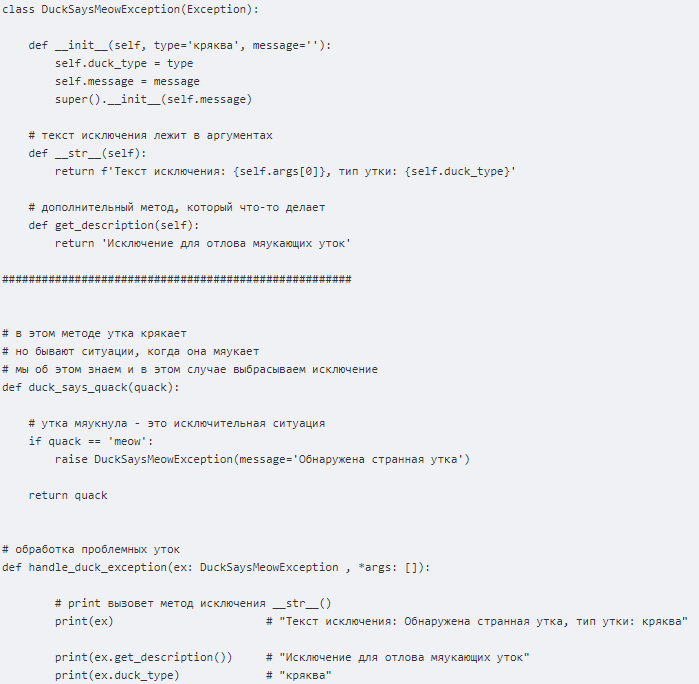
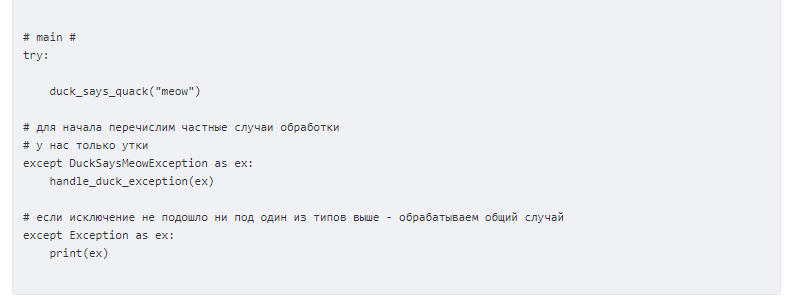

In [11]:
### кастомное исключение для отлова мяукающих уток ###
class DuckSaysMeowException(Exception):

    def __init__(self, type='кряква', message=''):
        self.duck_type = type
        self.message = message
        super().__init__(self.message)

    # текст исключения лежит в аргументах
    def __str__(self):
        return f'Текст исключения: {self.args[0]}, тип утки: {self.duck_type}'

    # дополнительный метод, который что-то делает
    def get_description(self):
        return 'Исключение для отлова мяукающих уток'

#####################################################

# в этом методе утка крякает
# но бывают ситуации, когда она мяукает
# мы об этом знаем и в этом случае выбрасываем исключение
def duck_says_quack(quack):
        # утка мяукнула - это исключительная ситуация
    if quack == 'meow':
        raise DuckSaysMeowException(message='Обнаружена странная утка')

    return quack
# обработка проблемных уток
def handle_duck_exception(ex: DuckSaysMeowException , *args: []):

        # print вызовет метод исключения __str__()
        print(ex)                       # "Текст исключения: Обнаружена странная утка, тип утки: кряква"

        print(ex.get_description())     # "Исключение для отлова мяукающих уток"
        print(ex.duck_type)             # "кряква"
# main #
try:

    duck_says_quack("meow")

# для начала перечислим частные случаи обработки
# у нас только утки
except DuckSaysMeowException as ex:
    handle_duck_exception(ex)

# если исключение не подошло ни под один из типов выше - обрабатываем общий случай
except Exception as ex:
    print(ex)

Текст исключения: Обнаружена странная утка, тип утки: кряква
Исключение для отлова мяукающих уток
кряква


# Задание 9.5

Задание на самопроверку.

Создайте класс Square. Добавьте в конструктор класса Square собственное исключение NonPositiveDigitException, унаследованное от ValueError, которое будет срабатывать каждый раз, когда сторона квадрата меньше или равна 0.

In [20]:
class Square:
    def __init__(self, a):
        if a <= 0:
            raise NonPositiveDigitException('Неправильно указана сторона квадрата')

class NonPositiveDigitException(ValueError):
    pass

a = Square(0)

NonPositiveDigitException: Неправильно указана сторона квадрата

In [17]:
class NonPositiveDigitException(ValueError):
    pass
 
class Square:
    def __init__(self, a):
        if a <= 0:
            raise NonPositiveDigitException('Неправильно указана сторона квадрата')
a = Square(0)

NonPositiveDigitException: Неправильно указана сторона квадрата